# Started Polarizing 11/08/2022

In [2]:
from functions import MakeTime, MakeFullData, Fit, Spinup

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

data=np.loadtxt('windmill.txt')

t=MakeTime(data)[0]
pc=MakeFullData(data)[0]
tcUP=MakeFullData(data)[1]
tcDOWN=MakeFullData(data)[2]

In [3]:
t

array([  0.        ,   9.36666667,   9.38333333,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,  10.78333333,  10.78333333,  18.8       ,
        24.1       ,  27.08333333,  29.25      ,  37.06666667,
        40.51666667,  49.31666667,  51.48333333,  51.55      ,
        54.05      ,  54.1       ,  54.55      ,  54.61666667,
        54.66666667,  54.73333333,  54.75      ,  54.76666667,
        56.53333333,  56.6       ,  57.08333333,  57.11666667,
        57.3       ,  59.75      ,  62.95      ,  66.28333333,
        68.3       ,  70.48333333,  70.6       ,  74.58

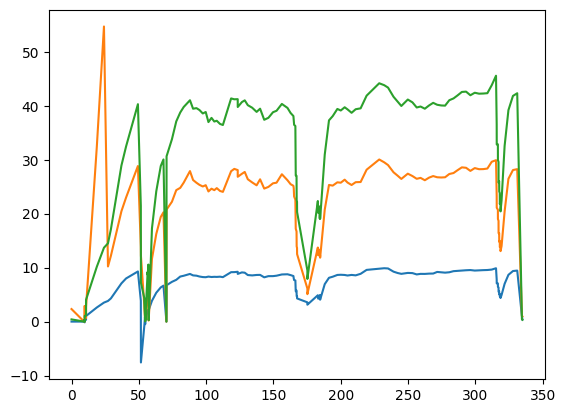

In [4]:
plt.plot(t,pc)
plt.plot(t,tcDOWN)
plt.plot(t,tcUP)

In [5]:
n=2

# d_tc Measurement

In [6]:
pctime=np.arange(0,n*len(pc),n)
tcDOWNtime=np.arange(0,n*len(tcDOWN),n)
tcUPtime=np.arange(0,n*len(tcUP),n)

In [7]:
pctime

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

In [8]:
r=3
e=10
it=[0,3]

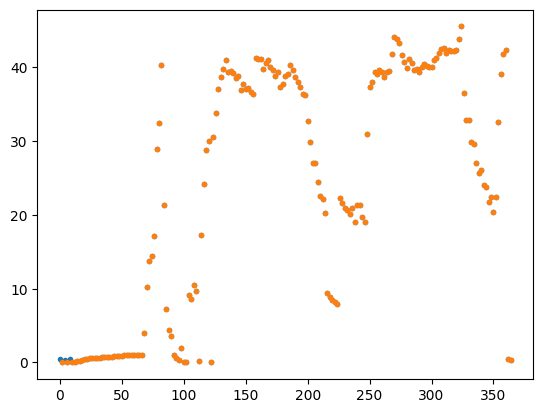

In [9]:
plt.plot(tcUPtime,tcUP,'.')
tcUPcut=np.delete(tcUP,[0,2,4])
tcUPtimecut=np.delete(tcUPtime,[0,2,4])
plt.plot(tcUPtimecut,tcUPcut,'.')

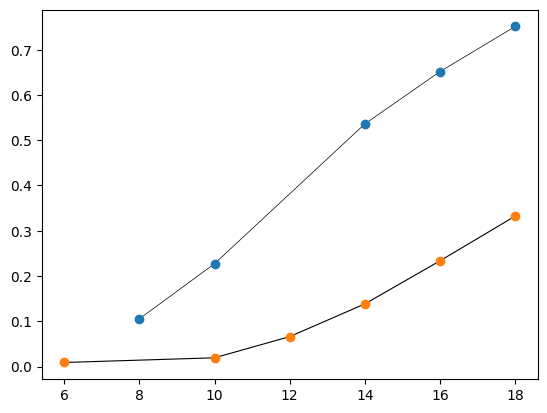

In [10]:
plt.plot(np.delete(pctime[r:e],it),np.delete(pc[r:e]*5,it),color='black',linewidth='.5')
plt.plot(np.delete(pctime[r:e],it),np.delete(pc[r:e]*5,it),'.',markersize=12)


plt.plot(np.delete(tcUPtime[r:e],1),np.delete(tcUP[r:e],1),color='black',linewidth='.8')
plt.plot(np.delete(tcUPtime[r:e],1),np.delete(tcUP[r:e],1),'.',markersize=12)


In [14]:
y1

array([0.021108 , 0.045457 , 0.1072135, 0.130326 , 0.150254 ])

# sk learn for regression

coefficient of determination: 0.9946447427375594
intercept: -0.08500272093023248
slope: [0.01332382]


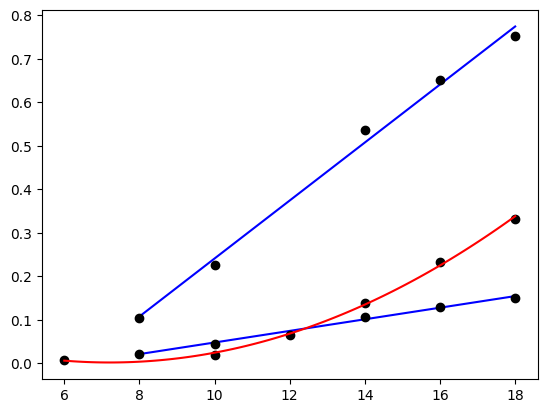

          2
0.002884 x - 0.04156 x + 0.1521
0.0034668218824026598
[0.02086463]
Quad param:  0.0034668218824026598 

Lin param:  0.02086463333119759


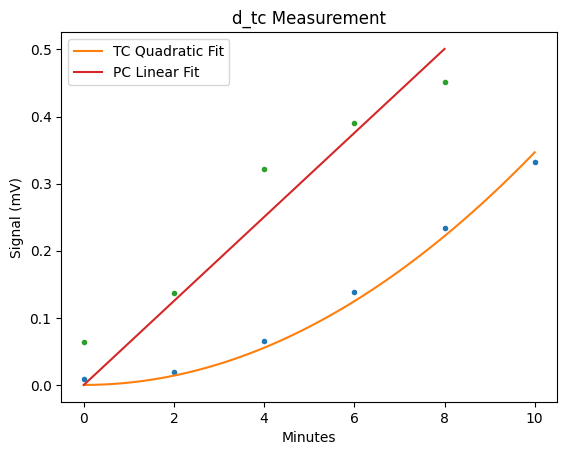

In [11]:
x1=np.delete(pctime[r:e],it).reshape(-1,1)
y1=np.delete(pc[r:e],it)

x2=np.delete(tcUPtime[r:e],1)
y2=np.delete(tcUP[r:e],1)



model = LinearRegression()

model.fit(x1,y1)


r_sq = model.score(x1, y1)
y1p=model.predict(x1)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

plt.plot(x1,y1p, color='blue')
plt.plot(x1,y1,'.',color='black',markersize=12)

model = np.poly1d(np.polyfit(x2, y2, 2))

x2[0]


x2[-1:][0]

#add fitted polynomial line to scatterplot
polyline = np.linspace(6, 18, 100)
plt.plot(x2, y2,'.',color='black',markersize=12)
plt.plot(polyline, model(polyline),color='red')
plt.plot(x1,5*y1p, color='blue')
plt.plot(x1,5*y1,'.',color='black',markersize=12)
plt.show()

print(model)



def Linear(x,m):
    return m*x

def xSquared(x,A):
    return A*x**2

x1=np.delete(pctime[r:e],it).reshape(-1,1)
y1=np.delete(pc[r:e],it)

x2=np.delete(tcUPtime[r:e],1)
y2=np.delete(tcUP[r:e],1)

x1

x1time=np.arange(0,10,2)

x2

x2time=np.arange(0,12,2)

fitTC=curve_fit(xSquared,x2time,y2)
fitPC=curve_fit(Linear,x1time,y1)

print(fitTC[0][0])

print(fitPC[0])

fitx=np.linspace(0,10,100)

scale=3

plt.plot(x2time,y2,'.')
plt.plot(fitx,xSquared(fitx,.00346682),label='TC Quadratic Fit')
plt.plot(x1time,scale*y1,'.')
plt.plot(x1time,scale*Linear(x1time,fitPC[0][0]),label='PC Linear Fit')
plt.legend(loc='upper left')
plt.ylabel('Signal (mV)')
plt.xlabel('Minutes')
plt.title('d_tc Measurement')
print('Quad param: ', fitTC[0][0],'\n')
print('Lin param: ', fitPC[0][0])



# $P_{tc}(t)=\frac{1}{2}  \gamma_{se}P_{A}d_{tc} t^{2}$
# $P_{pc}(t)=\gamma_{se}P_At$


#  $S_{tc}(t)= \frac{\frac{1}{2}  \gamma_{se}P_{A}d_{tc} t^{2}}{C_{tc}}$
# $S_{pc}(t)=\frac{\gamma_{se}P_At}{C_{pc}}$


# $\frac{\frac{1}{2}  \gamma_{se}P_{A}d_{tc}}{C_{tc}} =.00347$

# $\frac{\gamma_{se}P_A}{C_{pc}}=.02086$

# Spinup Nov 9 

In [34]:
t

array([  0.        ,   9.36666667,   9.38333333,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,   9.8       ,   9.8       ,   9.8       ,
         9.8       ,  10.78333333,  10.78333333,  18.8       ,
        24.1       ,  27.08333333,  29.25      ,  37.06666667,
        40.51666667,  49.31666667,  51.48333333,  51.55      ,
        54.05      ,  54.1       ,  54.55      ,  54.61666667,
        54.66666667,  54.73333333,  54.75      ,  54.76666667,
        56.53333333,  56.6       ,  57.08333333,  57.11666667,
        57.3       ,  59.75      ,  62.95      ,  66.28333333,
        68.3       ,  70.48333333,  70.6       ,  74.58

In [35]:
spinupnov9t=t[33:37]

spinupnov9t[1]+=2

spinupnov9t-=10.7833333

pc=MakeFullData(data)[0][33:37]
tcDOWN=MakeFullData(data)[1][33:37]
tcUP=MakeFullData(data)[2][33:37]

In [36]:
spinupnov9t

array([3.33333325e-08, 2.00000003e+00, 8.01666670e+00, 1.33166667e+01])

In [37]:
tcUP

array([ 0.6635515,  2.7039705, 32.442217 , 54.685953 ])

In [38]:
tcDOWN

array([ 1.081286 ,  4.0354355, 10.169069 , 13.694921 ])

In [39]:
tcFitnov8=Fit(tcDOWN,spinupnov9t)


P_0 =  1.118 +/- 0.082 
 P_inf =  20.064 +/- 0.81 
 T_sc =  12.25 +/- [1. 0.]


/home/research/GEn/GEn Polarimetry/functions.py:4: RuntimeWarning: overflow encountered in exp
  return ((P_0 - P_inf)*np.exp(-1.0*g_sc*t) + P_inf)


In [40]:
pcFitnov8=Fit(pc,spinupnov9t)

P_0 =  0.327 +/- 0.003 
 P_inf =  5.336 +/- 0.033 
 T_sc =  13.12 +/- [0. 0.]


In [41]:
s=4

In [42]:
ratio=np.divide(pc,tcDOWN)

In [43]:
1/np.average(ratio)

3.7289870618124636

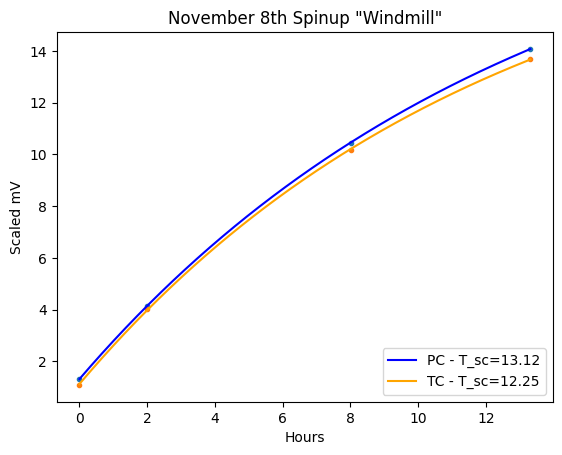

In [44]:
plt.plot(spinupnov9t,s*pc,'.')
plt.plot(spinupnov9t,tcDOWN,'.')
plt.plot(pcFitnov8[4],s*pcFitnov8[3],color='blue', label='PC - T_sc=13.12')
plt.plot(tcFitnov8[4],tcFitnov8[3],color='orange',label='TC - T_sc=12.25')
plt.title('November 8th Spinup "Windmill"')
plt.ylabel('Scaled mV')
plt.xlabel('Hours')
plt.legend(loc='lower right')

In [45]:
#t, P_0, P_inf, g_sc

# $\frac{1}{2}d_{tc}= \frac{.00347}{.02086}* R$

In [46]:
2*1/np.average(ratio)*.00347/.02086

1.2406121864323345

# $d_{tc}=1.2406$

In [47]:
t

array([0.00000000e+00, 9.36666667e+00, 9.38333333e+00, 9.80000000e+00,
       9.80000000e+00, 9.80000000e+00, 9.80000000e+00, 9.80000000e+00,
       9.80000000e+00, 9.80000000e+00, 9.80000000e+00, 9.80000000e+00,
       9.80000000e+00, 9.80000000e+00, 9.80000000e+00, 9.80000000e+00,
       9.80000000e+00, 9.80000000e+00, 9.80000000e+00, 9.80000000e+00,
       9.80000000e+00, 9.80000000e+00, 9.80000000e+00, 9.80000000e+00,
       9.80000000e+00, 9.80000000e+00, 9.80000000e+00, 9.80000000e+00,
       9.80000000e+00, 9.80000000e+00, 9.80000000e+00, 9.80000000e+00,
       9.80000000e+00, 3.33333325e-08, 2.00000003e+00, 8.01666670e+00,
       1.33166667e+01, 2.70833333e+01, 2.92500000e+01, 3.70666667e+01,
       4.05166667e+01, 4.93166667e+01, 5.14833333e+01, 5.15500000e+01,
       5.40500000e+01, 5.41000000e+01, 5.45500000e+01, 5.46166667e+01,
       5.46666667e+01, 5.47333333e+01, 5.47500000e+01, 5.47666667e+01,
       5.65333333e+01, 5.66000000e+01, 5.70833333e+01, 5.71166667e+01,
      

# Changed the oven to 235 11092022

In [48]:
np.transpose(data)[0]

array([2.21108100e+09, 2.21108192e+09, 2.21108192e+09, 2.21108195e+09,
       2.21108195e+09, 2.21108195e+09, 2.21108195e+09, 2.21108195e+09,
       2.21108195e+09, 2.21108195e+09, 2.21108195e+09, 2.21108195e+09,
       2.21108195e+09, 2.21108195e+09, 2.21108195e+09, 2.21108195e+09,
       2.21108195e+09, 2.21108195e+09, 2.21108195e+09, 2.21108195e+09,
       2.21108195e+09, 2.21108195e+09, 2.21108195e+09, 2.21108195e+09,
       2.21108195e+09, 2.21108195e+09, 2.21108195e+09, 2.21108195e+09,
       2.21108195e+09, 2.21108195e+09, 2.21108195e+09, 2.21108195e+09,
       2.21108195e+09, 2.21108205e+09, 2.21108205e+09, 2.21109045e+09,
       2.21109101e+09, 2.21109130e+09, 2.21109152e+09, 2.21109230e+09,
       2.21110023e+09, 2.21110112e+09, 2.21110133e+09, 2.21110133e+09,
       2.21110160e+09, 2.21110161e+09, 2.21110163e+09, 2.21110164e+09,
       2.21110164e+09, 2.21110164e+09, 2.21110164e+09, 2.21110165e+09,
       2.21110183e+09, 2.21110184e+09, 2.21110190e+09, 2.21110191e+09,
      

In [49]:
cut1=57
cut2=0

In [50]:
data[cut1:]

array([[ 2.21110214e+09,  3.98085700e+00,  3.73062500e+00,
         1.17974930e+01,  1.14494200e+01,  1.75364610e+01,
         1.70186400e+01],
       [ 2.21111006e+09,  5.51583400e+00,  5.17932500e+00,
         1.65118740e+01,  1.59699420e+01,  2.45340230e+01,
         2.37395070e+01],
       [ 2.21111042e+09,  6.53514400e+00,  6.13367400e+00,
         1.96802960e+01,  1.90994860e+01,  2.92888260e+01,
         2.83683220e+01],
       [ 2.21111062e+09,  6.85846000e+00,  6.46837000e+00,
         2.05139080e+01,  2.00016010e+01,  3.05048060e+01,
         2.95950820e+01],
       [ 2.21111083e+09, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.21111084e+09,  6.93852500e+00,  6.53179900e+00,
         2.10710030e+01,  2.04291440e+01,  3.10417670e+01,
         3.02233250e+01],
       [ 2.21111124e+09,  7.59760900e+00,  7.13372300e+00,
         2.25636390e+01,  2.18510260e+01,  3.43138190e+01,
         3.3262351

In [51]:
len(data)

183

In [52]:
if cut2==0:
    t=MakeTime(data[cut1:])[0]
    pc=MakeFullData(data[cut1:])[0]
    tcUP=MakeFullData(data[cut1:])[1]
    tcDOWN=MakeFullData(data[cut1:])[2]
else:
    t=MakeTime(data[cut1:cut2])[0]
    pc=MakeFullData(data[cut1:cut2])[0]
    tcUP=MakeFullData(data[cut1:cut2])[1]
    tcDOWN=MakeFullData(data[cut1:cut2])[2]
    
#get rid of bad sweep
t=np.delete(t,4)
pc=np.delete(pc,4)
tcUP=np.delete(tcUP,4)
tcDOWN=np.delete(tcDOWN,4)
#t[1]+=2

In [53]:
t

array([  0.        ,   3.2       ,   6.53333333,   8.55      ,
        10.85      ,  14.83333333,  18.05      ,  21.        ,
        23.58333333,  28.23333333,  30.53333333,  33.05      ,
        35.3       ,  37.75      ,  39.93333333,  41.95      ,
        44.21666667,  46.3       ,  48.13333333,  50.56666667,
        52.68333333,  58.78333333,  61.15      ,  63.7       ,
        63.71666667,  66.8       ,  68.91666667,  71.18333333,
        74.45      ,  77.73333333,  80.31666667,  83.38333333,
        86.48333333,  89.9       ,  92.55      ,  96.48333333,
       100.66666667, 102.98333333, 105.06666667, 105.31666667,
       105.58333333, 106.51666667, 106.63333333, 106.75      ,
       106.8       , 107.38333333, 107.45      , 107.48333333,
       107.75      , 107.8       , 115.43333333, 115.43333333,
       115.43333333, 115.43333333, 115.43333333, 123.2       ,
       123.26666667, 123.28333333, 123.41666667, 123.43333333,
       124.63333333, 124.63333333, 124.71666667, 124.73

In [54]:
pc

array([3.855741 , 5.3475795, 6.334409 , 6.663415 , 6.735162 , 7.365666 ,
       7.739583 , 8.346107 , 8.4945685, 8.831117 , 8.56128  , 8.5086425,
       8.352936 , 8.2509855, 8.2251835, 8.337585 , 8.2622085, 8.2975715,
       8.279539 , 8.3219415, 8.237508 , 9.1582945, 9.167872 , 9.2312985,
       8.8394155, 9.116089 , 9.0615825, 8.626644 , 8.5585895, 8.6410605,
       8.6548825, 8.200428 , 8.4217785, 8.424741 , 8.5055845, 8.733929 ,
       8.7697565, 8.6151325, 8.441407 , 8.0030415, 7.6968585, 7.6296635,
       6.952346 , 6.250142 , 5.6113235, 5.767424 , 5.2158815, 4.6918985,
       4.7028485, 4.292143 , 3.569418 , 3.463064 , 3.3613925, 3.2390855,
       3.13088  , 4.883566 , 4.700474 , 4.542599 , 4.420193 , 4.2670305,
       4.4433865, 4.1718365, 4.9202045, 4.7570555, 4.186141 , 4.0554645,
       6.9414835, 8.1151935, 8.3185145, 8.6432235, 8.6780375, 8.639216 ,
       8.541662 , 8.64786  , 8.568037 , 8.854047 , 9.5809605, 9.807696 ,
       9.8884255, 9.8455495, 9.254136 , 9.001526 , 

In [55]:
tcUP

array([17.2775505, 24.136765 , 28.828574 , 30.049944 , 30.632546 ,
       33.788085 , 37.0989365, 38.746834 , 39.7684845, 41.015042 ,
       39.446641 , 39.554252 , 39.201601 , 38.5662595, 38.8376635,
       36.9693285, 37.7513115, 37.0744475, 37.2132515, 36.6248835,
       36.4287875, 41.3528625, 41.1938565, 41.2182775, 39.7641915,
       40.6759135, 40.9984115, 40.1038855, 39.630615 , 38.8576575,
       39.44979  , 37.394961 , 37.7620555, 38.7982005, 39.0689675,
       40.3320925, 39.59571  , 38.6518765, 38.0866435, 37.312077 ,
       36.4645475, 36.252046 , 32.742737 , 29.888773 , 27.071898 ,
       27.0029555, 24.4886885, 22.506552 , 22.2043485, 20.302039 ,
        9.476331 ,  8.9304845,  8.469709 ,  8.1813305,  7.903222 ,
       22.340635 , 21.5828515, 20.9086925, 20.7407315, 20.1802195,
       20.945182 , 19.0861115, 21.35505  , 21.320948 , 19.723704 ,
       19.0610615, 30.9342415, 37.290008 , 38.078244 , 39.402882 ,
       39.118437 , 39.716732 , 39.322344 , 38.6899555, 39.3490

In [56]:
tcDOWN

array([11.6234565, 16.240908 , 19.389891 , 20.2577545, 20.7500735,
       22.2073325, 24.361767 , 24.7787455, 25.749963 , 27.8894595,
       26.2377955, 25.7266525, 25.334821 , 25.0392525, 25.27647  ,
       24.11779  , 24.6265615, 24.3569325, 24.7310045, 24.2051235,
       24.0388315, 27.8684625, 28.296681 , 28.077339 , 26.83496  ,
       27.3854825, 27.7322505, 26.3789125, 25.7883375, 25.2544745,
       26.3664865, 24.647648 , 24.956967 , 25.624711 , 25.743383 ,
       27.3064805, 26.19304  , 25.458628 , 25.164427 , 24.7106845,
       23.181347 , 22.584742 , 20.18323  , 18.5496935, 17.196827 ,
       16.709118 , 15.002382 , 13.9401305, 13.6449355, 12.4983795,
        6.131776 ,  5.865369 ,  5.5396555,  5.263544 ,  5.0846895,
       13.7189545, 13.464213 , 12.934553 , 12.7289915, 12.313337 ,
       13.3264995, 12.1038235, 12.8593585, 12.4185855, 12.229833 ,
       11.846276 , 20.7424455, 25.3202505, 25.198989 , 25.8069435,
       25.7388465, 26.2973385, 25.765088 , 25.3106945, 25.8327

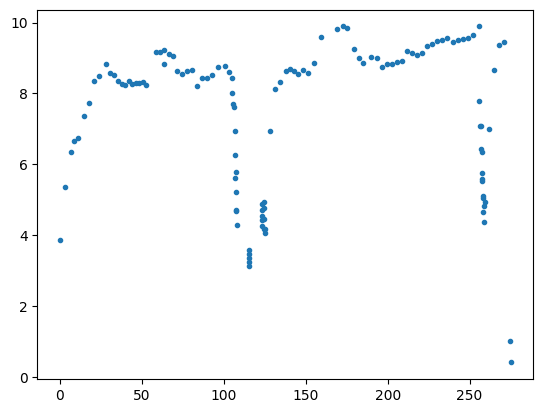

In [57]:
plt.plot(t,pc,'.')
#plt.plot(t,tcUP,'.')
#plt.plot(t,tcUP,'.')


In [58]:
fit1=Fit(pc,t)

P_0 =  3.856 +/- inf 
 P_inf =  7.401 +/- inf 
 T_sc =  0.0 +/- [inf inf]


/home/research/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [59]:
fit2=Fit(tcUP,t)

P_0 =  17.278 +/- inf 
 P_inf =  33.402 +/- inf 
 T_sc =  0.0 +/- [inf inf]


In [60]:
fit3=Fit(tcDOWN,t)

P_0 =  11.623 +/- inf 
 P_inf =  21.911 +/- inf 
 T_sc =  0.0 +/- [inf inf]


In [61]:
pcscale=float(fit2[1][:5])/float(fit1[1][:5])+.1
tcscale=float(fit2[1][:5])/float(fit3[1][:5])+.1

In [62]:
fit3[1]

'21.911 +/- inf'

Text(0.5, 1.0, 'Windmill Spinup November 10-11 2022')

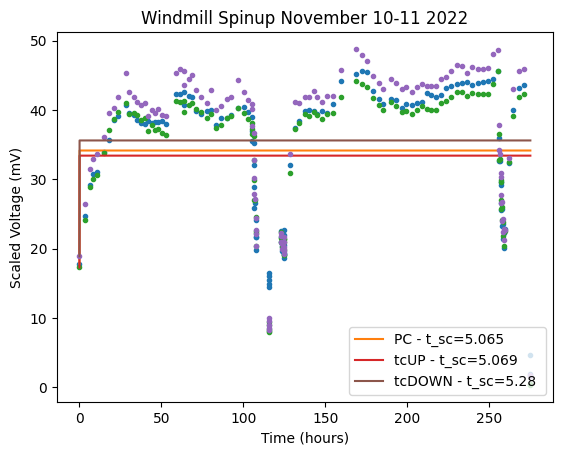

In [63]:
plt.plot(t,pcscale*pc,'.')
plt.plot(fit1[4],pcscale*fit1[3],label='PC - t_sc=5.065 ')
plt.plot(t,tcUP,'.')
plt.plot(fit2[4],fit2[3],label='tcUP - t_sc=5.069 ')
plt.plot(t,tcscale*tcDOWN,'.')
plt.plot(fit3[4],tcscale*fit3[3],label='tcDOWN - t_sc=5.28 ')
plt.legend(loc='lower right')
plt.ylabel('Scaled Voltage (mV)')
plt.xlabel('Time (hours)')
plt.title('Windmill Spinup November 10-11 2022')